In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import norm
df = pd.read_csv('ElectricCarData_Clean.csv')
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

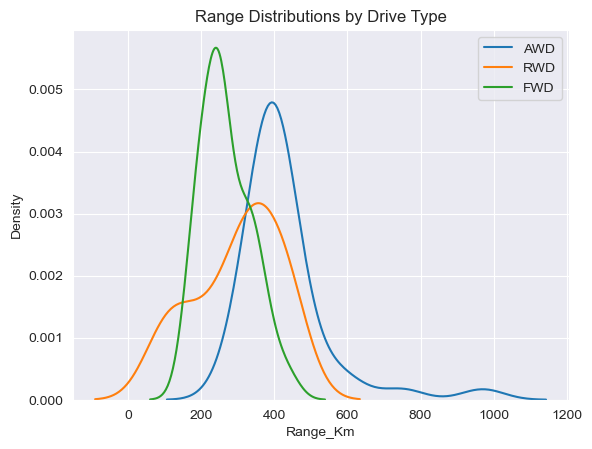

In [8]:
sns.kdeplot(df[df['PowerTrain'] == 'AWD']['Range_Km'], label='AWD')
sns.kdeplot(df[df['PowerTrain'] == 'RWD']['Range_Km'], label='RWD')
sns.kdeplot(df[df['PowerTrain'] == 'FWD']['Range_Km'], label='FWD')
plt.title('Range Distributions by Drive Type')
plt.legend()
plt.show()


In [3]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [5]:
numerical_cols = [
    'TopSpeed_KmH',
    'Range_Km',
    'AccelSec',
    'Efficiency_WhKm',
    'FastCharge_KmH'
]

df_numerical = df[numerical_cols]


In [6]:
df_clean = df_numerical.replace('-', pd.NA).dropna()
df_clean = df_clean.astype(float)


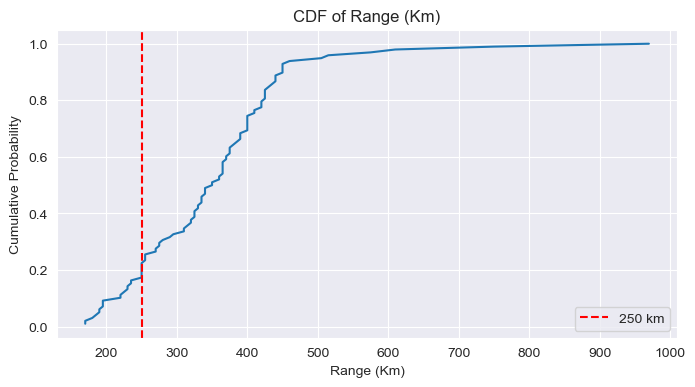

Proportion of EVs with range ≤ 250 km: 22.45%


In [10]:
import numpy as np

range_data = df_clean['Range_Km']
sorted_range = np.sort(range_data)
cdf = np.arange(1, len(sorted_range)+1) / len(sorted_range)

# Plot the CDF
plt.figure(figsize=(8, 4))
plt.plot(sorted_range, cdf)
plt.axvline(250, color='r', linestyle='--', label='250 km')
plt.title('CDF of Range (Km)')
plt.xlabel('Range (Km)')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

# Get the CDF value at 250
prob_below_250 = np.sum(range_data <= 250) / len(range_data)
print(f"Proportion of EVs with range ≤ 250 km: {prob_below_250:.2%}")


In [22]:
# Filter EVs with range ≤ 250 km
evs_below_250 = df[df['Range_Km'] <= 250]




In [29]:
evs_below_250.iloc[:, [0,1,3,4,6]].value_counts().head(10)

Brand        Model             TopSpeed_KmH  Range_Km  FastCharge_KmH
BMW          i3 120 Ah         150           235       270               1
Nissan       Leaf              144           220       230               1
Volkswagen   e-Golf            150           190       220               1
Sono         Sion              140           225       270               1
Smart        EQ fortwo coupe   130           100       -                 1
             EQ fortwo cabrio  130           95        -                 1
             EQ forfour        130           95        -                 1
Skoda        CITIGOe iV        130           195       170               1
SEAT         Mii Electric      130           195       170               1
Renault      Twingo ZE         135           130       -                 1
Name: count, dtype: int64

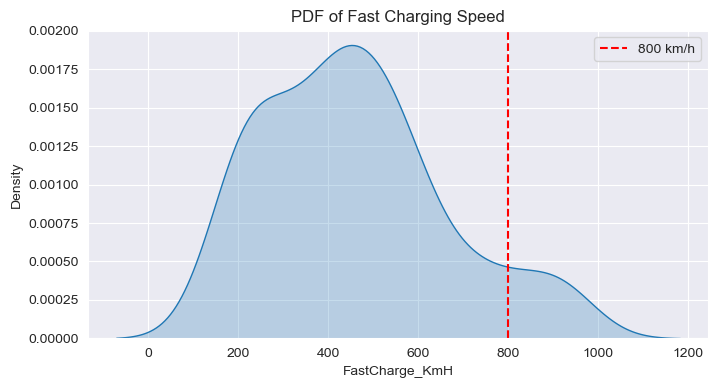

Proportion of EVs with fast charge ≥ 800 km/h: 8.16%


In [17]:

fastcharge_data = df_clean['FastCharge_KmH']

# Plot PDF
plt.figure(figsize=(8, 4))
sns.kdeplot(fastcharge_data, fill=True)
plt.axvline(800, color='r', linestyle='--', label='800 km/h')
plt.title('PDF of Fast Charging Speed')
plt.xlabel('FastCharge_KmH')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Proportion of ultra-fast chargers
ultra_fast_pct = np.sum(fastcharge_data >= 800) / len(fastcharge_data)
print(f"Proportion of EVs with fast charge ≥ 800 km/h: {ultra_fast_pct:.2%}")

In [25]:

df['FastCharge_KmH'] = pd.to_numeric(df['FastCharge_KmH'], errors='coerce')

# Now filter EVs with fast charging ≥ 800 km/h
ultra_fast_evs = df[df['FastCharge_KmH'] >= 800]

# Display the list
print("EVs with fast charge ≥ 800 km/h:")
print(ultra_fast_evs[['Brand', 'FastCharge_KmH']])  



EVs with fast charge ≥ 800 km/h:
       Brand  FastCharge_KmH
0     Tesla            940.0
21    Tesla            930.0
23     Audi            850.0
24    Tesla            910.0
51    Tesla            920.0
61    Tesla            900.0
65  Porsche            890.0
79  Porsche            810.0


In [28]:
ultra_fast_evs.iloc[:,[0,1,3,4,6]].value_counts()

Brand     Model                           TopSpeed_KmH  Range_Km  FastCharge_KmH
Audi      e-tron GT                       240           425       850.0             1
Porsche   Taycan 4S Plus                  250           425       890.0             1
          Taycan Turbo                    260           390       810.0             1
Tesla     Model 3 Long Range Dual Motor   233           450       940.0             1
          Model 3 Long Range Performance  261           435       910.0             1
          Model Y Long Range Dual Motor   217           425       930.0             1
          Model Y Long Range Performance  241           410       900.0             1
          Roadster                        410           970       920.0             1
Name: count, dtype: int64